
<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in the course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-06-11 14:40:29--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.07s   

2020-06-11 14:40:30 (305 KB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df = df.filter(['loan_status','Principal','terms','effective_date','due_date','age','education','Gender'])

In [5]:
df.shape

(346, 8)

### Convert to date time object 

In [6]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [7]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [8]:
# notice: installing seaborn might takes a few minutes
# !conda install -c anaconda seaborn -y


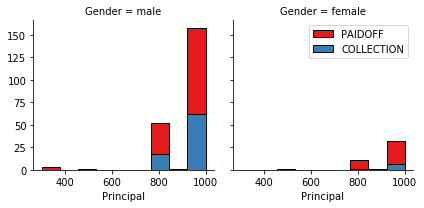

In [9]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

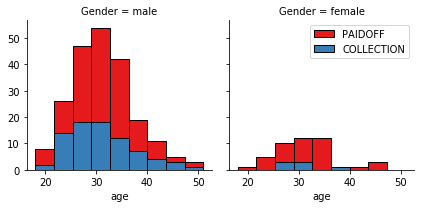

In [10]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

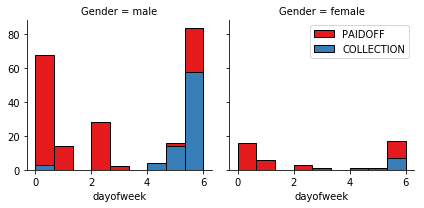

In [11]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [12]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [13]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


## One Hot Encoding  
#### How about education?

In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature before One Hot Encoding

In [15]:
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [16]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,male,High School or Below
1,1000,30,33,female,Bechalor
2,1000,15,27,male,college
3,1000,30,28,female,college
4,1000,30,29,male,college


#### Use Label encoding technique to convert categorical varables to binary variables and append them to the feature Data Frame 

In [17]:
df['education'].value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

In [18]:
# educ_order = ['High School or Below', 'college', 'Bechalor', 'Master or Above']
# df['education'] = df['education'].astype('category')
# df['education'] = df['education'].cat.reorder_categories(educ_order, ordered=True)
# df['education'] = df['education'].cat.codes.astype(int)
# df['education'].value_counts()

In [19]:
Feature = df[['Principal','terms','age','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education']),pd.get_dummies(df['Gender'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,weekend,Bechalor,High School or Below,college,female,male
0,1000,30,45,0,0,1,0,0,1
1,1000,30,33,0,1,0,0,1,0
2,1000,15,27,0,0,0,1,0,1
3,1000,30,28,1,0,0,1,1,0
4,1000,30,29,1,0,0,1,0,1


### Feature selection

Lets defind feature sets, X:

In [20]:
X = Feature
X[0:5]

,Principal,terms,age,weekend,Bechalor,High School or Below,college,female,male
0,1000,30,45,0,0,1,0,0,1
1,1000,30,33,0,1,0,0,1,0
2,1000,15,27,0,0,0,1,0,1
3,1000,30,28,1,0,0,1,1,0
4,1000,30,29,1,0,0,1,0,1


What are our lables?

In [21]:
df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)
y = df['loan_status'].values
y[0:5]

array([0, 0, 0, 0, 0])

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [22]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -1.20577805, -0.38170062,
         1.13639374, -0.86968108, -0.42056004,  0.42056004],
       [ 0.51578458,  0.92071769,  0.34170148, -1.20577805,  2.61985426,
        -0.87997669, -0.86968108,  2.37778177, -2.37778177],
       [ 0.51578458, -0.95911111, -0.65321055, -1.20577805, -0.38170062,
        -0.87997669,  1.14984679, -0.42056004,  0.42056004],
       [ 0.51578458,  0.92071769, -0.48739188,  0.82934003, -0.38170062,
        -0.87997669,  1.14984679,  2.37778177, -2.37778177],
       [ 0.51578458,  0.92071769, -0.3215732 ,  0.82934003, -0.38170062,
        -0.87997669,  1.14984679, -0.42056004,  0.42056004]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

## Oversampling

In [23]:
# !conda install -c glemaitre imbalanced-learn

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

X_train_res, X_test, y_train_res, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

sm = SMOTE(random_state = 2)
X_train, y_train = sm.fit_sample(X_train_res, y_train_res.ravel())

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

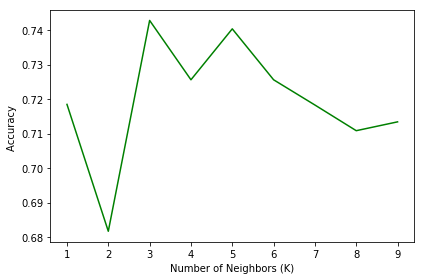

The best accuracy was with 0.7428048780487804 with k= 3


In [84]:
from sklearn.neighbors import KNeighborsClassifier
k=10
acc_score  = np.zeros(k-1)
for i in range(1,k):
    knn = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    acc_score[i-1]=scores.mean() 
plt.plot(range(1,k),acc_score,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", acc_score.max(), "with k=", acc_score.argmax()+1) 

In [87]:
param_grid = {'n_neighbors': range(1,k), 
              'leaf_size':[1,2,3,4,5],
              'algorithm':['auto', 'kd_tree']} 

grid = GridSearchCV(knn, param_grid, refit = True,cv=5, verbose = 3) 
grid.fit(X_train, y_train) 
print(grid.best_params_) 
print(grid.best_estimator_)


Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] algorithm=auto, leaf_size=1, n_neighbors=1 ......................
[CV]  algorithm=auto, leaf_size=1, n_neighbors=1, score=0.6097560975609756, total=   0.0s
[CV] algorithm=auto, leaf_size=1, n_neighbors=1 ......................
[CV]  algorithm=auto, leaf_size=1, n_neighbors=1, score=0.6707317073170732, total=   0.0s
[CV] algorithm=auto, leaf_size=1, n_neighbors=1 ......................
[CV]  algorithm=auto, leaf_size=1, n_neighbors=1, score=0.8048780487804879, total=   0.0s
[CV] algorithm=auto, leaf_size=1, n_neighbors=1 ......................
[CV]  algorithm=auto, leaf_size=1, n_neighbors=1, score=0.7073170731707317, total=   0.0s
[CV] algorithm=auto, leaf_size=1, n_neighbors=1 ......................
[CV]  algorithm=auto, leaf_size=1, n_neighbors=1, score=0.8, total=   0.0s
[CV] algorithm=auto, leaf_size=1, n_neighbors=2 ......................
[CV]  algorithm=auto, leaf_size=1, n_neighbors=2, score=0.6097560975609756, t

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  algorithm=auto, leaf_size=1, n_neighbors=4, score=0.7439024390243902, total=   0.0s
[CV] algorithm=auto, leaf_size=1, n_neighbors=4 ......................
[CV]  algorithm=auto, leaf_size=1, n_neighbors=4, score=0.7073170731707317, total=   0.0s
[CV] algorithm=auto, leaf_size=1, n_neighbors=4 ......................
[CV]  algorithm=auto, leaf_size=1, n_neighbors=4, score=0.7073170731707317, total=   0.0s
[CV] algorithm=auto, leaf_size=1, n_neighbors=4 ......................
[CV]  algorithm=auto, leaf_size=1, n_neighbors=4, score=0.7073170731707317, total=   0.0s
[CV] algorithm=auto, leaf_size=1, n_neighbors=4 ......................
[CV]  algorithm=auto, leaf_size=1, n_neighbors=4, score=0.7625, total=   0.0s
[CV] algorithm=auto, leaf_size=1, n_neighbors=5 ......................
[CV]  algorithm=auto, leaf_size=1, n_neighbors=5, score=0.6951219512195121, total=   0.0s
[CV] algorithm=auto, leaf_size=1, n_neighbors=5 ......................
[CV]  algorithm=auto, leaf_size=1, n_neighbors

[CV]  algorithm=auto, leaf_size=2, n_neighbors=6, score=0.6951219512195121, total=   0.0s
[CV] algorithm=auto, leaf_size=2, n_neighbors=6 ......................
[CV]  algorithm=auto, leaf_size=2, n_neighbors=6, score=0.7439024390243902, total=   0.0s
[CV] algorithm=auto, leaf_size=2, n_neighbors=6 ......................
[CV]  algorithm=auto, leaf_size=2, n_neighbors=6, score=0.75, total=   0.0s
[CV] algorithm=auto, leaf_size=2, n_neighbors=7 ......................
[CV]  algorithm=auto, leaf_size=2, n_neighbors=7, score=0.6707317073170732, total=   0.0s
[CV] algorithm=auto, leaf_size=2, n_neighbors=7 ......................
[CV]  algorithm=auto, leaf_size=2, n_neighbors=7, score=0.7195121951219512, total=   0.0s
[CV] algorithm=auto, leaf_size=2, n_neighbors=7 ......................
[CV]  algorithm=auto, leaf_size=2, n_neighbors=7, score=0.6951219512195121, total=   0.0s
[CV] algorithm=auto, leaf_size=2, n_neighbors=7 ......................
[CV]  algorithm=auto, leaf_size=2, n_neighbors=7

[CV]  algorithm=auto, leaf_size=3, n_neighbors=8, score=0.7317073170731707, total=   0.0s
[CV] algorithm=auto, leaf_size=3, n_neighbors=8 ......................
[CV]  algorithm=auto, leaf_size=3, n_neighbors=8, score=0.725, total=   0.0s
[CV] algorithm=auto, leaf_size=3, n_neighbors=9 ......................
[CV]  algorithm=auto, leaf_size=3, n_neighbors=9, score=0.6463414634146342, total=   0.0s
[CV] algorithm=auto, leaf_size=3, n_neighbors=9 ......................
[CV]  algorithm=auto, leaf_size=3, n_neighbors=9, score=0.7439024390243902, total=   0.0s
[CV] algorithm=auto, leaf_size=3, n_neighbors=9 ......................
[CV]  algorithm=auto, leaf_size=3, n_neighbors=9, score=0.6585365853658537, total=   0.0s
[CV] algorithm=auto, leaf_size=3, n_neighbors=9 ......................
[CV]  algorithm=auto, leaf_size=3, n_neighbors=9, score=0.7560975609756098, total=   0.0s
[CV] algorithm=auto, leaf_size=3, n_neighbors=9 ......................
[CV]  algorithm=auto, leaf_size=3, n_neighbors=

[CV]  algorithm=auto, leaf_size=5, n_neighbors=3, score=0.7317073170731707, total=   0.0s
[CV] algorithm=auto, leaf_size=5, n_neighbors=3 ......................
[CV]  algorithm=auto, leaf_size=5, n_neighbors=3, score=0.7875, total=   0.0s
[CV] algorithm=auto, leaf_size=5, n_neighbors=4 ......................
[CV]  algorithm=auto, leaf_size=5, n_neighbors=4, score=0.7560975609756098, total=   0.0s
[CV] algorithm=auto, leaf_size=5, n_neighbors=4 ......................
[CV]  algorithm=auto, leaf_size=5, n_neighbors=4, score=0.7073170731707317, total=   0.0s
[CV] algorithm=auto, leaf_size=5, n_neighbors=4 ......................
[CV]  algorithm=auto, leaf_size=5, n_neighbors=4, score=0.7317073170731707, total=   0.0s
[CV] algorithm=auto, leaf_size=5, n_neighbors=4 ......................
[CV]  algorithm=auto, leaf_size=5, n_neighbors=4, score=0.7073170731707317, total=   0.0s
[CV] algorithm=auto, leaf_size=5, n_neighbors=4 ......................
[CV]  algorithm=auto, leaf_size=5, n_neighbors

[CV]  algorithm=kd_tree, leaf_size=1, n_neighbors=5, score=0.7560975609756098, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=1, n_neighbors=5 ...................
[CV]  algorithm=kd_tree, leaf_size=1, n_neighbors=5, score=0.775, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=1, n_neighbors=6 ...................
[CV]  algorithm=kd_tree, leaf_size=1, n_neighbors=6, score=0.7073170731707317, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=1, n_neighbors=6 ...................
[CV]  algorithm=kd_tree, leaf_size=1, n_neighbors=6, score=0.7073170731707317, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=1, n_neighbors=6 ...................
[CV]  algorithm=kd_tree, leaf_size=1, n_neighbors=6, score=0.6951219512195121, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=1, n_neighbors=6 ...................
[CV]  algorithm=kd_tree, leaf_size=1, n_neighbors=6, score=0.7560975609756098, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=1, n_neighbors=6 ...................
[CV]  algorithm=kd_tree, leaf

[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=8, score=0.7073170731707317, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=2, n_neighbors=8 ...................
[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=8, score=0.7073170731707317, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=2, n_neighbors=8 ...................
[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=8, score=0.7439024390243902, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=2, n_neighbors=8 ...................
[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=8, score=0.725, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=2, n_neighbors=9 ...................
[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=9, score=0.6463414634146342, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=2, n_neighbors=9 ...................
[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=9, score=0.7560975609756098, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=2, n_neighbors=9 ...................
[CV]  algorithm=kd_tree, leaf

[CV]  algorithm=kd_tree, leaf_size=4, n_neighbors=2, score=0.6951219512195121, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=4, n_neighbors=2 ...................
[CV]  algorithm=kd_tree, leaf_size=4, n_neighbors=2, score=0.7073170731707317, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=4, n_neighbors=2 ...................
[CV]  algorithm=kd_tree, leaf_size=4, n_neighbors=2, score=0.75, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=4, n_neighbors=3 ...................
[CV]  algorithm=kd_tree, leaf_size=4, n_neighbors=3, score=0.7560975609756098, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=4, n_neighbors=3 ...................
[CV]  algorithm=kd_tree, leaf_size=4, n_neighbors=3, score=0.7073170731707317, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=4, n_neighbors=3 ...................
[CV]  algorithm=kd_tree, leaf_size=4, n_neighbors=3, score=0.7439024390243902, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=4, n_neighbors=3 ...................
[CV]  algorithm=kd_tree, leaf_

[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=6, score=0.7073170731707317, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=6 ...................
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=6, score=0.6951219512195121, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=6 ...................
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=6, score=0.7682926829268293, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=6 ...................
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=6, score=0.75, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=7 ...................
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=7, score=0.6707317073170732, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=7 ...................
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=7, score=0.7195121951219512, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=7 ...................
[CV]  algorithm=kd_tree, leaf_

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    5.2s finished


In [88]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=2, n_neighbors=3).fit(X_train,y_train)
knn.fit(X_train,y_train)
y_pred_knn =knn.predict(X_test)
accuracy_score(y_pred_knn,y_test)

0.7714285714285715

In [89]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

# Decision Tree

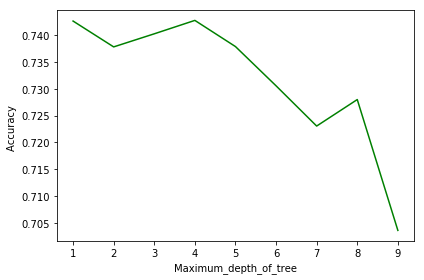

The best accuracy was with 0.7427439024390244 with depth= 4


In [30]:
from sklearn.tree import DecisionTreeClassifier
d=10
acc_score  = np.zeros(d-1)
for i in range(1,d):
    tree = DecisionTreeClassifier(criterion='gini',max_depth=i)
    scores = cross_val_score(tree, X_train, y_train, cv=5, scoring='accuracy')
    acc_score[i-1]=scores.mean() 
plt.plot(range(1,d),acc_score,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Maximum_depth_of_tree')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", acc_score.max(), "with depth=", acc_score.argmax()+1) 

In [31]:
param_grid = {"criterion": ['gini', 'entropy'],
              "max_depth": range(1,d)} 

grid = GridSearchCV(tree, param_grid, refit = True, verbose = 3, cv=5) 
grid.fit(X_train, y_train) 
print(grid.best_params_) 
print(grid.best_estimator_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] criterion=gini, max_depth=1 .....................................
[CV]  criterion=gini, max_depth=1, score=0.7195121951219512, total=   0.0s
[CV] criterion=gini, max_depth=1 .....................................
[CV]  criterion=gini, max_depth=1, score=0.7560975609756098, total=   0.0s
[CV] criterion=gini, max_depth=1 .....................................
[CV]  criterion=gini, max_depth=1, score=0.7317073170731707, total=   0.0s
[CV] criterion=gini, max_depth=1 .....................................
[CV]  criterion=gini, max_depth=1, score=0.7682926829268293, total=   0.0s
[CV] criterion=gini, max_depth=1 .....................................
[CV] ........ criterion=gini, max_depth=1, score=0.7375, total=   0.0s
[CV] criterion=gini, max_depth=2 .....................................
[CV]  criterion=gini, max_depth=2, score=0.6585365853658537, total=   0.0s
[CV] criterion=gini, max_depth=2 ..................................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=entropy, max_depth=5, score=0.7926829268292683, total=   0.0s
[CV] criterion=entropy, max_depth=5 ..................................
[CV] ....... criterion=entropy, max_depth=5, score=0.75, total=   0.0s
[CV] criterion=entropy, max_depth=6 ..................................
[CV]  criterion=entropy, max_depth=6, score=0.6951219512195121, total=   0.0s
[CV] criterion=entropy, max_depth=6 ..................................
[CV]  criterion=entropy, max_depth=6, score=0.6951219512195121, total=   0.0s
[CV] criterion=entropy, max_depth=6 ..................................
[CV]  criterion=entropy, max_depth=6, score=0.7682926829268293, total=   0.0s
[CV] criterion=entropy, max_depth=6 ..................................
[CV]  criterion=entropy, max_depth=6, score=0.7926829268292683, total=   0.0s
[CV] criterion=entropy, max_depth=6 ..................................
[CV] ..... criterion=entropy, max_depth=6, score=0.7625, total=   0.0s
[CV] criterion=entropy, max_depth=7 ......

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.3s finished


In [32]:
tree = DecisionTreeClassifier(criterion='entropy',max_depth=7)
tree.fit(X_train,y_train)
y_pred_tree = tree.predict(X_test)
accuracy_score(y_pred_tree,y_test)

0.6714285714285714

In [33]:
tree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Support Vector Machine

In [76]:
from sklearn.svm import SVC
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
            'kernel': ['rbf']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv=5) 
grid.fit(X_train, y_train) 
print(grid.best_params_) 
print(grid.best_estimator_)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7439024390243902, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6585365853658537, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.8048780487804879, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7804878048780488, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ............ C=0.1, gamma=1, kernel=rbf, score=0.7, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.7195121951219512, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ...................................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.7682926829268293, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ...... C=0.1, gamma=0.01, kernel=rbf, score=0.7625, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.6829268292682927, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.6829268292682927, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.7560975609756098, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.7560975609756098, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ..... C=0.1, gamma=0.001, kernel=rbf, score=0.7625, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf ......

[CV]  C=100, gamma=1, kernel=rbf, score=0.7317073170731707, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.7317073170731707, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.8048780487804879, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.8536585365853658, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ........... C=100, gamma=1, kernel=rbf, score=0.75, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV]  C=100, gamma=0.1, kernel=rbf, score=0.7073170731707317, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV]  C=100, gamma=0.1, kernel=rbf, score=0.7682926829268293, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf .....................

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    2.4s finished


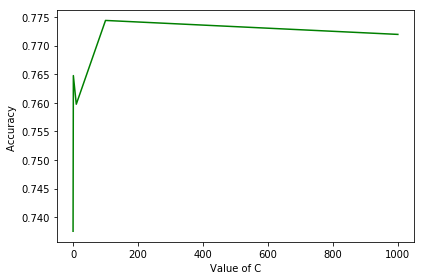

The best accuracy was with 0.774390243902439 with C = 3


In [77]:
c = [0.1, 1, 10, 100, 1000]
acc_score  = np.zeros(5)
for i,j in zip(range(0,5),c) :
    clf = SVC(C=j,gamma=1,kernel='rbf')
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    acc_score[i]=scores.mean() 
plt.plot(c,acc_score,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Value of C')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", acc_score.max(), "with C =", acc_score.argmax()) 

In [78]:
clf = SVC(C=100,gamma=1,kernel='rbf')
clf.fit(X_train, y_train) 
y_pred_svm = clf.predict(X_test)
accuracy_score(y_pred_svm,y_test)

0.7285714285714285

In [79]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_svm,labels=[0,1]))

[[43 13]
 [ 6  8]]


In [80]:
print(classification_report(y_test,y_pred_svm))


             precision    recall  f1-score   support

          0       0.88      0.77      0.82        56
          1       0.38      0.57      0.46        14

avg / total       0.78      0.73      0.75        70



In [81]:
clf.fit(X,y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
# defining parameter range 
logr = LogisticRegression()
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000], 
            'penalty': ['l1','l2'], 
            'solver': ['liblinear'],
             'max_iter':[100,200]} 

grid = GridSearchCV(logr, param_grid, refit = True, verbose = 3, cv=5) 
grid.fit(X_train, y_train) 
print(grid.best_params_) 
print(grid.best_estimator_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, score=0.5, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, score=0.5, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, score=0.5, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, score=0.5, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, score=0.5, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l2, solver=liblinear, score=0.7317073170731707, total=   0.0s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, max_iter=100, penalty=l1, solver=liblinear, score=0.7195121951219512, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=liblinear ................
[CV]  C=10, max_iter=100, penalty=l1, solver=liblinear, score=0.7073170731707317, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=liblinear ................
[CV]  C=10, max_iter=100, penalty=l1, solver=liblinear, score=0.7560975609756098, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=liblinear ................
[CV]  C=10, max_iter=100, penalty=l1, solver=liblinear, score=0.7195121951219512, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=liblinear ................
[CV]  C=10, max_iter=100, penalty=l1, solver=liblinear, score=0.7625, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=liblinear ................
[CV]  C=10, max_iter=100, penalty=l2, solver=liblinear, score=0.7195121951219512, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=liblinear ................
[CV]  C=10

[CV]  C=1000, max_iter=200, penalty=l1, solver=liblinear, score=0.7195121951219512, total=   0.2s
[CV] C=1000, max_iter=200, penalty=l1, solver=liblinear ..............
[CV]  C=1000, max_iter=200, penalty=l1, solver=liblinear, score=0.7560975609756098, total=   0.0s
[CV] C=1000, max_iter=200, penalty=l1, solver=liblinear ..............
[CV]  C=1000, max_iter=200, penalty=l1, solver=liblinear, score=0.7195121951219512, total=   0.0s
[CV] C=1000, max_iter=200, penalty=l1, solver=liblinear ..............
[CV]  C=1000, max_iter=200, penalty=l1, solver=liblinear, score=0.7625, total=   0.0s
[CV] C=1000, max_iter=200, penalty=l2, solver=liblinear ..............
[CV]  C=1000, max_iter=200, penalty=l2, solver=liblinear, score=0.7195121951219512, total=   0.0s
[CV] C=1000, max_iter=200, penalty=l2, solver=liblinear ..............
[CV]  C=1000, max_iter=200, penalty=l2, solver=liblinear, score=0.7195121951219512, total=   0.0s
[CV] C=1000, max_iter=200, penalty=l2, solver=liblinear .............

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    1.1s finished


In [60]:
logr = LogisticRegression(C=0.01, penalty='l2', solver='liblinear')
logr.fit(X_train,y_train)
y_pred_lr = logr.predict(X_test)
accuracy_score(y_test,y_pred_lr)

0.7

In [61]:
logr.fit(X,y)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf_clf = RandomForestClassifier()
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap} 

random_grid = RandomizedSearchCV(rf_clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42) 
random_grid.fit(X_train, y_train) 
print(random_grid.best_params_) 
print(random_grid.best_estimator_)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.7s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.7s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.7s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   3.3s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   3.3s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_sa

[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False, total=   1.4s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   3.2s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   3.3s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   3.4s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimat

[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   2.9s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   2.9s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   3.1s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total=   2.4s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimat

[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total=   3.0s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total=   2.9s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=   1.3s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=   1.3s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=800,

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, total=   1.7s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=   3.3s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=   3.3s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=   3.3s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=400, mi

[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total=   3.0s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total=   3.0s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total=   3.0s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True, total=   2.3s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=1400, 

[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total=   1.7s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total=   1.7s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, total=   3.3s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, total=   3.3s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_esti

[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True, total=   0.3s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, total=   3.2s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, total=   3.2s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, total=   3.2s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=600

[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   3.3s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   3.2s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   3.2s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=   1.4s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimato

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 10.0min finished


{'n_estimators': 1600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=1600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [43]:
rf_clf= RandomForestClassifier(n_estimators= 1600, min_samples_split= 5, min_samples_leaf= 1, max_features= 'auto', max_depth = 10, bootstrap= True) .fit(X,y)

In [44]:
rf_clf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=1600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Model Evaluation using Test set

In [45]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [46]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-06-11 14:57:19--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-06-11 14:57:19 (347 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [47]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [48]:
test_df =test_df.filter(['Principal','terms','age','Gender','education','effective_date','due_date','loan_status'])

In [49]:
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
# test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)
Feature = test_df[['Principal','terms','age','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(test_df['education']),pd.get_dummies(test_df['Gender'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,weekend,Bechalor,High School or Below,college,female,male
0,1000,30,50,0,1,0,0,1,0
1,300,7,35,1,0,0,0,0,1
2,1000,30,43,1,0,1,0,1,0
3,1000,30,26,1,0,0,1,0,1
4,800,15,29,1,1,0,0,0,1


In [50]:
test_X = Feature
test_X= preprocessing.StandardScaler().fit(test_X).transform(test_X)
test_y = test_df['loan_status']

In [90]:
report_df = pd.DataFrame(columns = ['Algorithm','Jaccard','F1-score','LogLoss'])
report_df.Algorithm = ['KNN','Decision Tree', 'SVM', 'LogisticRegression','RandomForestClassifier']
models = [knn, tree, clf, logr, rf_clf]
i=0
for model in models:
    y_pred  = model.predict(test_X)
    report_df['Jaccard'].iloc[i] = jaccard_similarity_score(y_pred, test_y)
    report_df['F1-score'].iloc[i] = f1_score(y_pred, test_y)
#     report_df['Accuracy'].iloc[i] = accuracy_score(y_pred, test_y)
    i=i+1    

y_pred_prob = logr.predict_proba(test_X)
report_df['LogLoss'].iloc[3] = log_loss(test_y,y_pred_prob )
    

In [91]:
report_df

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.648148,0.344828,NaN
1,Decision Tree,0.759259,0.434783,NaN
2,SVM,0.722222,0.285714,NaN
3,LogisticRegression,0.759259,0.133333,0.55737
4,RandomForestClassifier,0.703704,0.272727,NaN
